In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.models import load_model

model_path = '/content/drive/MyDrive/Models/Augmented_Alzheimer_Model_99.5.h5'
model = load_model(model_path)
print("Model loaded successfully!")

Model loaded successfully!


In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,124,270 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

 Optimizer params: 2 (12.00 B)

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

image = load_img("/content/test.png")

image_array = img_to_array(image)

image_array = np.expand_dims(image_array, axis=0)

print(f"Image shape for prediction: {image_array.shape}")

Image shape for prediction: (1, 297, 213, 3)


In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import tensorflow as tf

image = load_img("/content/test.jpg", target_size=(244, 244))

image_array = img_to_array(image)

image_array = np.expand_dims(image_array, axis=0)

print(f"Resized image shape: {image_array.shape}")

Resized image shape: (1, 244, 244, 3)


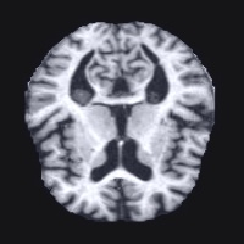

In [ ]:
image

In [ ]:
predictions = model.predict(image_array)

print("Predictions:", predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Predictions: [[1.0000000e+00 1.7113814e-21 0.0000000e+00 0.0000000e+00]]


In [ ]:
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

predicted_class = np.argmax(predictions)

print(f"Predicted class: {class_labels[predicted_class]}")

Predicted class: Mild Demented


In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [ ]:
import pandas as pd
import numpy as np
import keras
import warnings
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping

import sklearn.metrics as metrics
from keras.callbacks import LearningRateScheduler
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** x, verbose=0)

In [ ]:
import kagglehub

path = kagglehub.dataset_download("uraninjo/augmented-alzheimer-mri-dataset")

print("Path to dataset files:", path)

100%|██████████| 380M/380M [00:03<00:00, 117MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/uraninjo/augmented-alzheimer-mri-dataset/versions/1


In [ ]:
import os
import pandas as pd

MildDemented_dir = '/root/.cache/kagglehub/datasets/uraninjo/augmented-alzheimer-mri-dataset/versions/1/AugmentedAlzheimerDataset/MildDemented'
ModerateDemented_dir = '/root/.cache/kagglehub/datasets/uraninjo/augmented-alzheimer-mri-dataset/versions/1/AugmentedAlzheimerDataset/ModerateDemented'
NonDemented_dir = '/root/.cache/kagglehub/datasets/uraninjo/augmented-alzheimer-mri-dataset/versions/1/AugmentedAlzheimerDataset/NonDemented'
VeryMildDemented_dir = '/root/.cache/kagglehub/datasets/uraninjo/augmented-alzheimer-mri-dataset/versions/1/AugmentedAlzheimerDataset/VeryMildDemented'

filepaths = []
labels = []
dict_list = [MildDemented_dir, ModerateDemented_dir, NonDemented_dir, VeryMildDemented_dir]
class_labels = ['Mild Demented', 'Moderate Demented', 'Non Demented', 'Very MildDemented']

for i, j in enumerate(dict_list):
    flist = os.listdir(j)
    for f in flist:
        fpath = os.path.join(j, f)
        filepaths.append(fpath)
        labels.append(class_labels[i])

Fseries = pd.Series(filepaths, name="filepaths")
Lseries = pd.Series(labels, name="labels")
Alzheimer_data = pd.concat([Fseries, Lseries], axis=1)
Alzheimer_df = pd.DataFrame(Alzheimer_data)
print(Alzheimer_df.head())
print(Alzheimer_df["labels"].value_counts())

                                           filepaths         labels
0  /root/.cache/kagglehub/datasets/uraninjo/augme...  Mild Demented
1  /root/.cache/kagglehub/datasets/uraninjo/augme...  Mild Demented
2  /root/.cache/kagglehub/datasets/uraninjo/augme...  Mild Demented
3  /root/.cache/kagglehub/datasets/uraninjo/augme...  Mild Demented
4  /root/.cache/kagglehub/datasets/uraninjo/augme...  Mild Demented
labels
Non Demented         9600
Mild Demented        8960
Very MildDemented    8960
Moderate Demented    6464
Name: count, dtype: int64


In [ ]:
train_images, test_images = train_test_split(Alzheimer_df, test_size=0.3, random_state=42)
train_set, val_set = train_test_split(Alzheimer_df, test_size=0.2, random_state=42)

In [ ]:
print(train_set.shape)
print(test_images.shape)
print(val_set.shape)
print(train_images.shape)

(27187, 2)
(10196, 2)
(6797, 2)
(23788, 2)


In [ ]:
image_gen = ImageDataGenerator(preprocessing_function=tf.keras.applications.xception.preprocess_input)

train = image_gen.flow_from_dataframe(dataframe=train_set, x_col="filepaths", y_col="labels",
                                      target_size=(244, 244),
                                      color_mode='rgb',
                                      class_mode="categorical",
                                      batch_size=32,
                                      shuffle=False)

test = image_gen.flow_from_dataframe(dataframe=test_images, x_col="filepaths", y_col="labels",
                                     target_size=(244, 244),
                                     color_mode='rgb',
                                     class_mode="categorical",
                                     batch_size=32,
                                     shuffle=False)

val = image_gen.flow_from_dataframe(dataframe=val_set, x_col="filepaths", y_col="labels",
                                    target_size=(244, 244),
                                    color_mode='rgb',
                                    class_mode="categorical",
                                    batch_size=32,
                                    shuffle=False)

Found 27187 validated image filenames belonging to 4 classes.
Found 10196 validated image filenames belonging to 4 classes.
Found 6797 validated image filenames belonging to 4 classes.


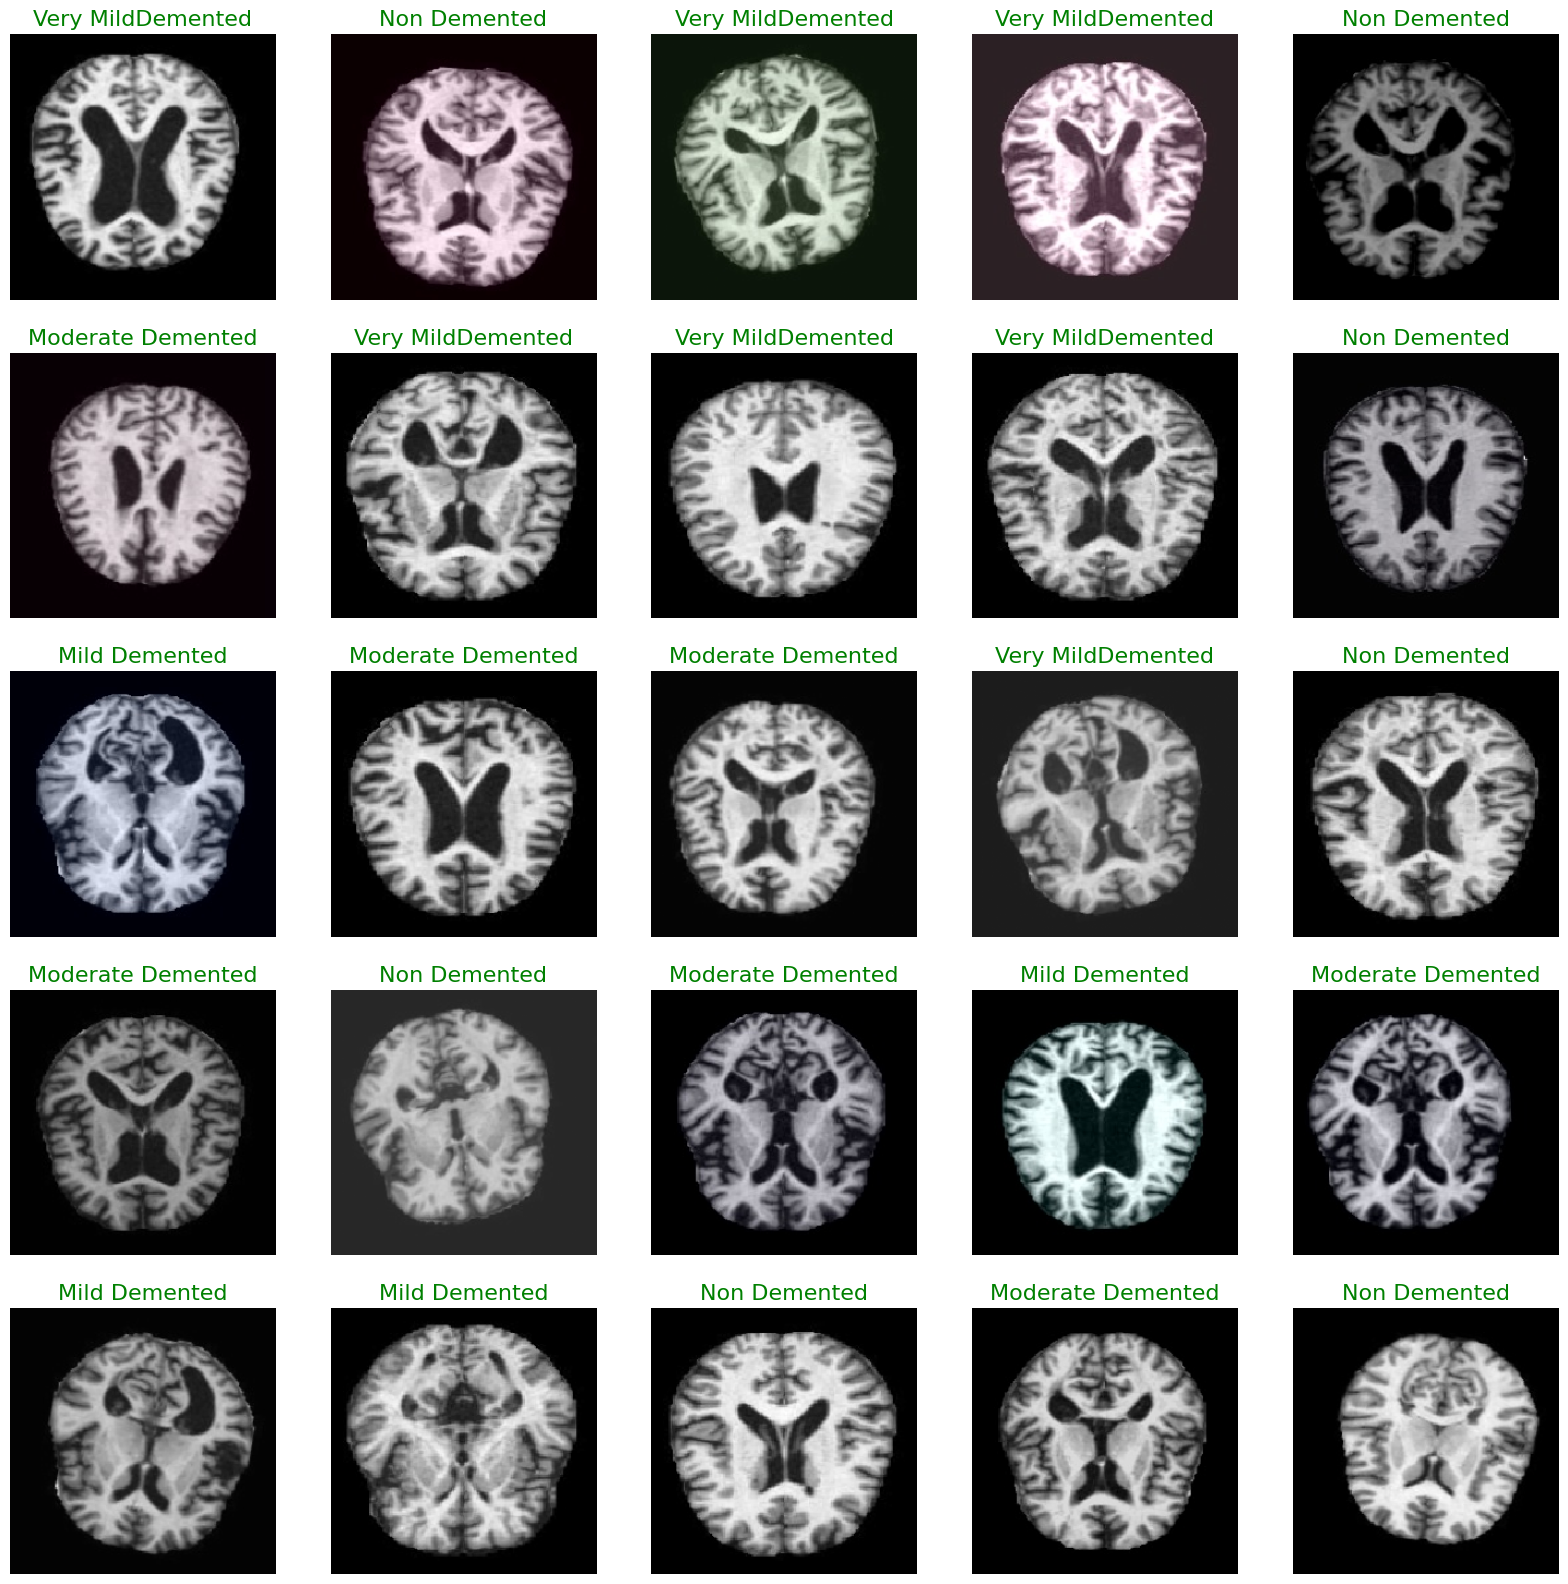

In [ ]:
def showimages(image_gen):
    test_dict = test.class_indices
    classes = list(test_dict.keys())
    images, labels=next(image_gen)
    plt.figure(figsize=(20,20))
    length = len(labels)
    if length<25:
        r=length
    else:
        r=25
    for i in range(r):
        plt.subplot(5,5,i+1)
        image=(images[i]+1)/2
        plt.imshow(image)
        index=np.argmax(labels[i])
        class_name=classes[index]
        plt.title(class_name, color="green",fontsize=16)
        plt.axis('off')
    plt.show()

showimages(train)

In [ ]:
from tensorflow.keras.optimizers import Adamax

img_shape=(244,244,3)
base_model = tf.keras.applications.Xception(include_top= False, weights= "imagenet",
                            input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    Flatten(),
    Dropout(rate= 0.3),
    Dense(128, activation= 'relu'),
    Dropout(rate= 0.25),
    Dense(4, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])

model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,124,268 (80.58 MB)

 Trainable params: 21,069,740 (80.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

In [ ]:
history = model.fit(train, epochs=10, validation_data=val, validation_freq=1)

Epoch 1/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 590s 622ms/step - accuracy: 0.6736 - loss: 0.7525 - val_accuracy: 0.8006 - val_loss: 0.5311
Epoch 2/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 491s 577ms/step - accuracy: 0.9648 - loss: 0.0983 - val_accuracy: 0.9718 - val_loss: 0.0813
Epoch 3/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 500s 574ms/step - accuracy: 0.9891 - loss: 0.0347 - val_accuracy: 0.9840 - val_loss: 0.0488
Epoch 4/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 491s 577ms/step - accuracy: 0.9905 - loss: 0.0274 - val_accuracy: 0.9913 - val_loss: 0.0257
Epoch 5/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 500s 575ms/step - accuracy: 0.9948 - loss: 0.0156 - val_accuracy: 0.9270 - val_loss: 0.3155
Epoch 6/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 490s 577ms/step - accuracy: 0.9932 - loss: 0.0189 - val_accuracy: 0.9907 - val_loss: 0.0258
Epoch 7/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 502s 577ms/step - accuracy: 0.9972 - loss: 0.0079 - val_accuracy: 0.9876 - val_loss: 0.0400
Epoch 8/10
850/850 ━━━━━━━━━━━━━━━━━━━━ 501s 590ms/step - accuracy: 0.9981 -

In [ ]:
model.evaluate(test, verbose=1)

319/319 ━━━━━━━━━━━━━━━━━━━━ 56s 175ms/step - accuracy: 0.9948 - loss: 0.0205


[0.013502477668225765, 0.9960768818855286]

In [ ]:
model.save("DLmodel.5.keras")

In [ ]:
pred = model.predict(test)
pred = np.argmax(pred, axis=1)

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred2 = [labels[k] for k in pred]

319/319 ━━━━━━━━━━━━━━━━━━━━ 48s 143ms/step


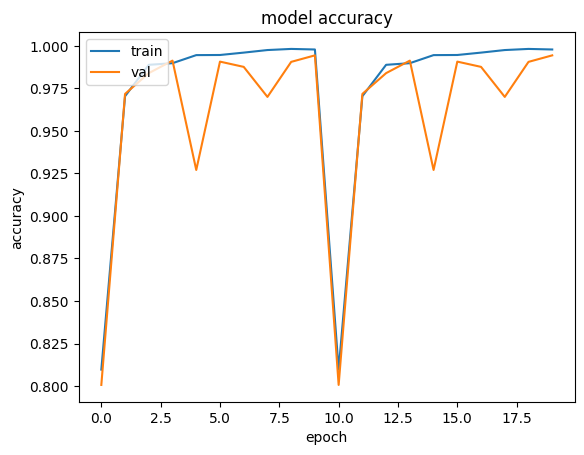

In [ ]:
plt.plot(history.history['accuracy'] + history.history['accuracy'])
plt.plot(history.history['val_accuracy'] + history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
def show_predictions(image_gen, model):
    test_dict = image_gen.class_indices
    classes = list(test_dict.keys())

    images, labels = next(image_gen)
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    actual_labels = np.argmax(labels, axis=1)

    plt.figure(figsize=(20, 20))
    length = len(labels)
    r = min(length, 25)

    for i in range(r):
        plt.subplot(5, 5, i + 1)
        image = (images[i] + 1) / 2
        plt.imshow(image)

        actual_class = classes[actual_labels[i]]
        predicted_class = classes[predicted_labels[i]]

        color = "green" if actual_class == predicted_class else "red"
        title = f"Pred: {predicted_class}\nActual: {actual_class}"

        plt.title(title, color=color, fontsize=12)
        plt.axis('off')

    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


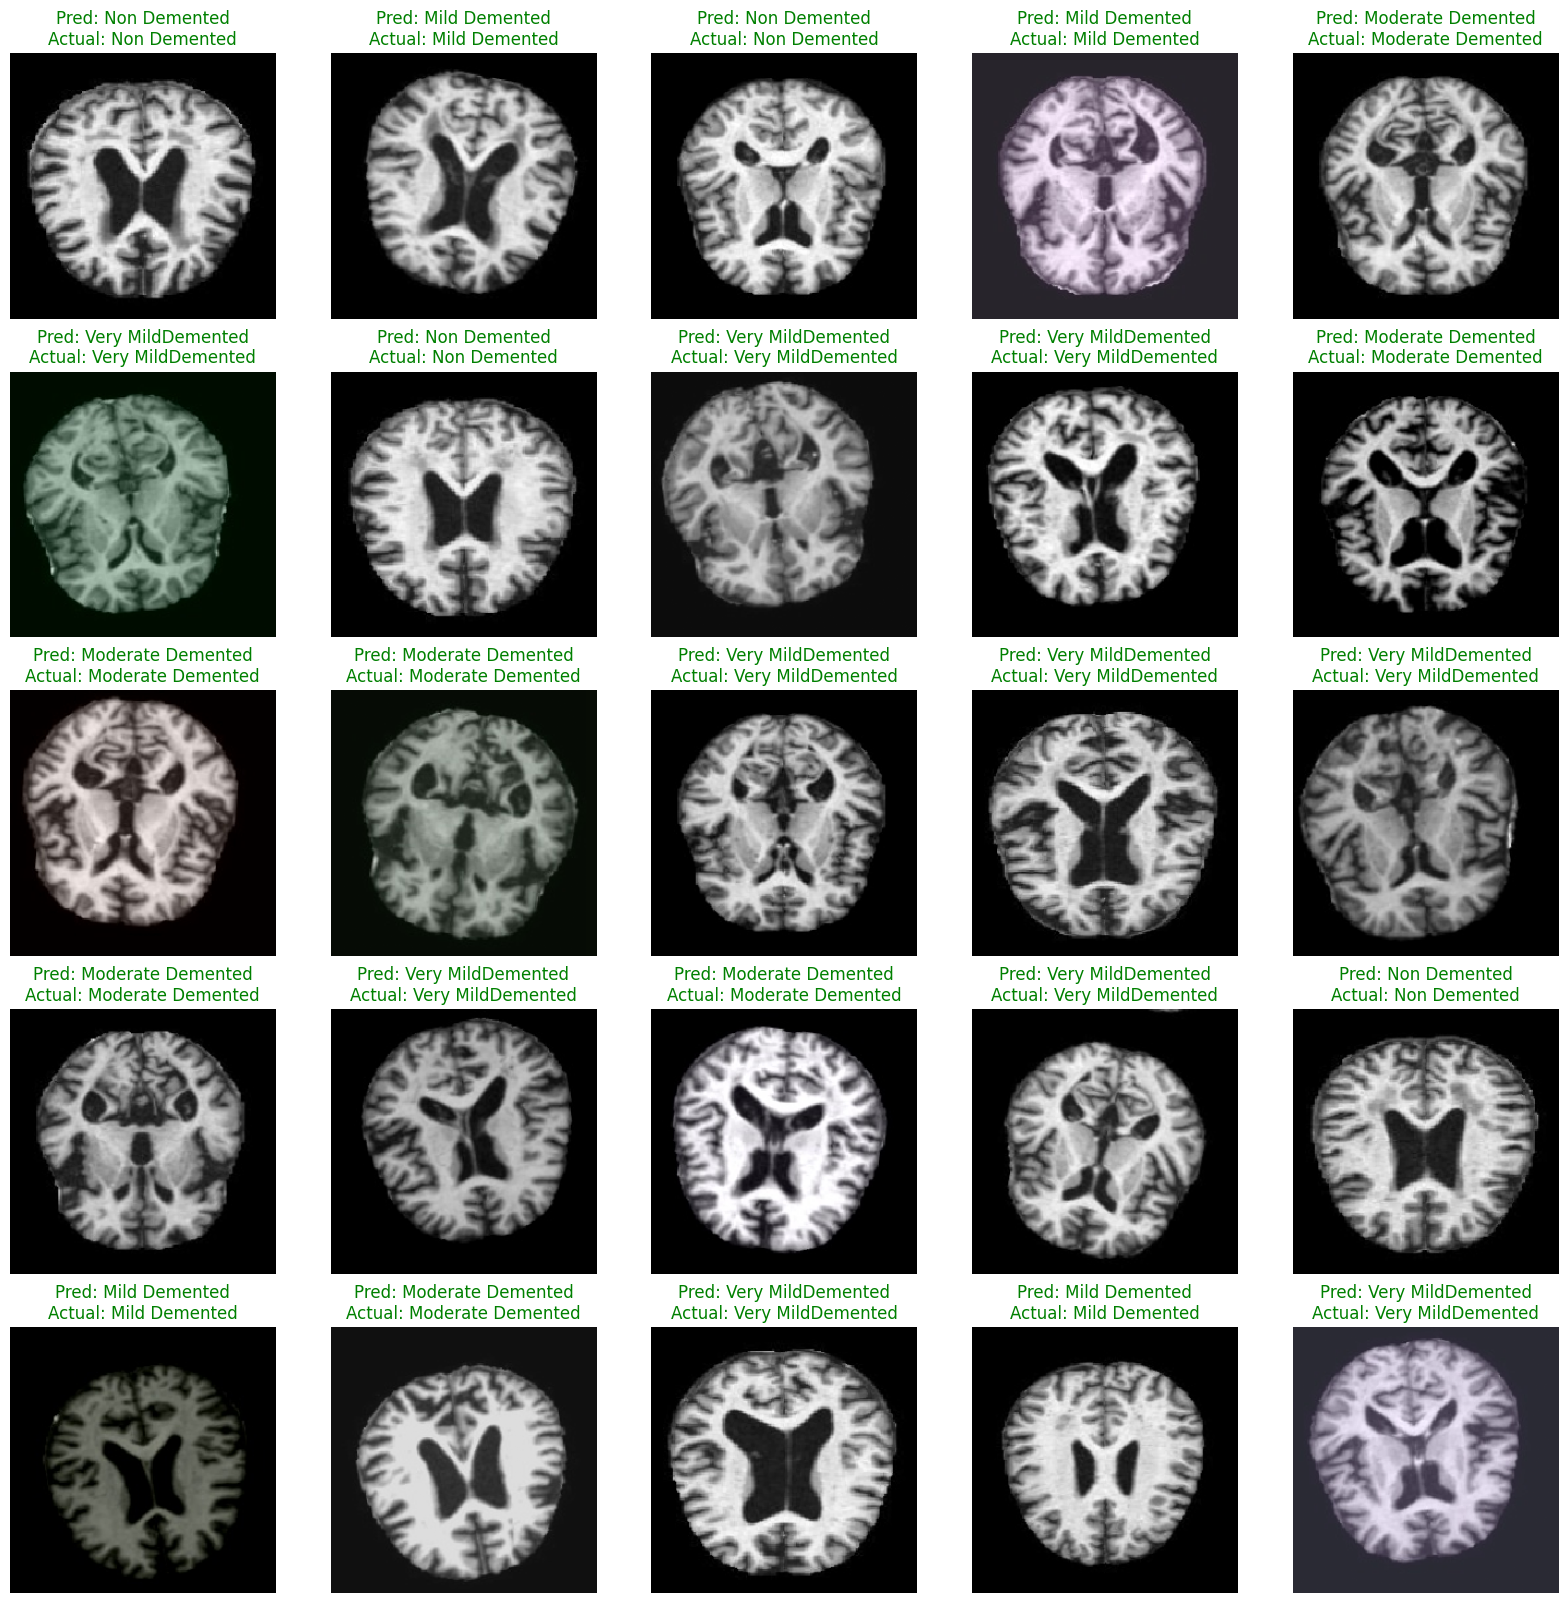

In [ ]:
show_predictions(test, model)